##### Agnieszka Marciszewska

# Machine Learning
## Assigment 3
#### Perform some experiments with convolutional neural networks, for example using Keras.

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

#### Table of contents: <a class="anchor" id="toc"></a>
* [Download and prepare data](#data)
* [Model1](#model1) 
** [Change optimizer](#model11)
** [Change activation function](#model12)
** [Change padding](#model13)
** [Add more batches](#model14)
** [Change kernel](#model15)
** [Comparision](#model1_compare)
* [Adding more layers, changing layer settings](#modele25)
** [Model2 - 2 convolutions layer](#model2)
** [Model3 - 3 convolutions layer](#model3)
** [Model4 - 2 convolutions layer, fully connected layer, dropout](#model4)
** [Model5 - fully connected layer, dropout](#model5)
** [Compariosn models 2-5](#compare25)

## FASHION MNIST DATASET 

## Download and prepare data  <a class="anchor" id="data"></a>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

## Model 1 <a class="anchor" id="model1"></a>

In [7]:
batch_size = 64
num_classes = 10
epochs = 10
input_shape = (28, 28,1)

In [8]:
x_train_1 = x_train[:]
x_test_1 = x_test[:]

y_train_1 = y_train[:] 
y_test_1 = y_test[:] 

In [9]:
model_1 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(num_classes, activation='softmax')
    ])

model_1.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
history_1 = model_1.fit(x_train_1, y_train_1,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(x_test_1, y_test_1))

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.4702 - accuracy: 0.8364 - val_loss: 0.3956 - val_accuracy: 0.8609
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.3293 - accuracy: 0.8854 - val_loss: 0.3248 - val_accuracy: 0.8862
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2916 - accuracy: 0.8974 - val_loss: 0.3182 - val_accuracy: 0.8852
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2714 - accuracy: 0.9037 - val_loss: 0.3032 - val_accuracy: 0.8890
Epoch 5/10
938/938 [==============================] - 9s 9ms/step - loss: 0.2534 - accuracy: 0.9096 - val_loss: 0.2885 - val_accuracy: 0.8989
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2400 - accuracy: 0.9147 - val_loss: 0.2931 - val_accuracy: 0.8950
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2284 - accuracy: 0.9188 - val_loss: 0.2758 - val_accuracy: 0.90

In [11]:
loss_1, acc_1 = model_1.evaluate(x_test_1, y_test_1, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_1))

157/157 [==============================] - 0s 3ms/step - loss: 0.2733 - accuracy: 0.9040

Test accuracy: 90.4%


[Back to table of contents](#toc)

#### Model 1.1
##### change optimizer  <a class="anchor" id="model11"></a>

In [12]:
x_train_1_1 = x_train[:]
x_test_1_1 = x_test[:]

y_train_1_1 = y_train[:] 
y_test_1_1 = y_test[:] 

In [13]:
model_1_1 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(num_classes, activation='softmax')
    ])

model_1_1.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
history_1_1 = model_1_1.fit(x_train_1_1, y_train_1_1,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(x_test_1_1, y_test_1_1))

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 0.8195 - accuracy: 0.7309 - val_loss: 0.5961 - val_accuracy: 0.7851
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.5375 - accuracy: 0.8103 - val_loss: 0.5789 - val_accuracy: 0.7810
Epoch 3/10
938/938 [==============================] - 9s 9ms/step - loss: 0.4970 - accuracy: 0.8261 - val_loss: 0.5109 - val_accuracy: 0.8156
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.4742 - accuracy: 0.8337 - val_loss: 0.6454 - val_accuracy: 0.7707
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.4539 - accuracy: 0.8413 - val_loss: 0.4790 - val_accuracy: 0.8333
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.4408 - accuracy: 0.8461 - val_loss: 0.4762 - val_accuracy: 0.8319
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.4267 - accuracy: 0.8532 - val_loss: 0.4490 - val_accuracy: 0.8412
Ep

In [15]:
loss_1_1, acc_1_1 = model_1_1.evaluate(x_test_1_1, y_test_1_1, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_1_1))

157/157 [==============================] - 1s 5ms/step - loss: 0.4413 - accuracy: 0.8413

Test accuracy: 84.1%


[Back to table of contents](#toc)

#### Model 1.2
##### change activation function (to sigmoid)  <a class="anchor" id="model12"></a>

In [16]:
x_train_1_2 = x_train[:]
x_test_1_2 = x_test[:]

y_train_1_2 = y_train[:] 
y_test_1_2 = y_test[:] 

In [17]:
model_1_2 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='sigmoid', input_shape=input_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(num_classes, activation='softmax')
    ])

model_1_2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
history_1_2 = model_1_2.fit(x_train_1_2, y_train_1_2,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(x_test_1_2, y_test_1_2))

Epoch 1/10
938/938 [==============================] - 12s 12ms/step - loss: 0.9625 - accuracy: 0.6567 - val_loss: 0.6140 - val_accuracy: 0.7740
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.5481 - accuracy: 0.8000 - val_loss: 0.5449 - val_accuracy: 0.7947
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.4787 - accuracy: 0.8287 - val_loss: 0.5219 - val_accuracy: 0.8197
Epoch 4/10
938/938 [==============================] - 10s 11ms/step - loss: 0.4418 - accuracy: 0.8433 - val_loss: 0.4468 - val_accuracy: 0.8298
Epoch 5/10
938/938 [==============================] - 10s 10ms/step - loss: 0.4166 - accuracy: 0.8518 - val_loss: 0.4190 - val_accuracy: 0.8474
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3942 - accuracy: 0.8592 - val_loss: 0.3978 - val_accuracy: 0.8606
Epoch 7/10
938/938 [==============================] - 10s 10ms/step - loss: 0.3790 - accuracy: 0.8654 - val_loss: 0.4619 - val_accuracy:

In [19]:
loss_1_2, acc_1_2 = model_1_2.evaluate(x_test_1_2, y_test_1_2, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_1_2))

157/157 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8485

Test accuracy: 84.9%


[Back to table of contents](#toc)

#### Model 1.3
##### change padding  <a class="anchor" id="model13"></a>

In [20]:
x_train_1_3 = x_train[:]
x_test_1_3 = x_test[:]

y_train_1_3 = y_train[:] 
y_test_1_3 = y_test[:] 

In [21]:
model_1_3 = Sequential([
    Conv2D(32, (3,3), padding='valid', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(num_classes, activation='softmax')
    ])

model_1_3.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
history_1_3 = model_1_3.fit(x_train_1_3, y_train_1_3,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(x_test_1_3, y_test_1_3))

Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.4840 - accuracy: 0.8313 - val_loss: 0.3800 - val_accuracy: 0.8675
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3342 - accuracy: 0.8829 - val_loss: 0.3334 - val_accuracy: 0.8813
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2993 - accuracy: 0.8944 - val_loss: 0.3268 - val_accuracy: 0.8842
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2756 - accuracy: 0.9033 - val_loss: 0.3049 - val_accuracy: 0.8930
Epoch 5/10
938/938 [==============================] - 9s 9ms/step - loss: 0.2608 - accuracy: 0.9078 - val_loss: 0.2956 - val_accuracy: 0.8933
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2467 - accuracy: 0.9126 - val_loss: 0.2778 - val_accuracy: 0.8996
Epoch 7/10
938/938 [==============================] - 9s 9ms/step - loss: 0.2340 - accuracy: 0.9171 - val_loss: 0.2876 - val_accuracy: 0.8960
Epoch

In [23]:
loss_1_3, acc_1_3 = model_1_3.evaluate(x_test_1_3, y_test_1_3, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_1_3))

157/157 [==============================] - 1s 3ms/step - loss: 0.2693 - accuracy: 0.9036

Test accuracy: 90.4%


[Back to table of contents](#toc)

#### Model 1.4
##### add more batches   <a class="anchor" id="model14"></a>

In [24]:
x_train_1_4 = x_train[:]
x_test_1_4 = x_test[:]

y_train_1_4 = y_train[:] 
y_test_1_4 = y_test[:] 

In [25]:
model_1_4 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(num_classes, activation='softmax')
    ])

model_1_4.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
history_1_4 = model_1_4.fit(x_train_1_4, y_train_1_4,
                        epochs=epochs, 
                        batch_size=128,
                        validation_data=(x_test_1_4, y_test_1_4))

Epoch 1/10
469/469 [==============================] - 9s 19ms/step - loss: 0.5245 - accuracy: 0.8197 - val_loss: 0.4131 - val_accuracy: 0.8568
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.3520 - accuracy: 0.8781 - val_loss: 0.3493 - val_accuracy: 0.8779
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 0.3125 - accuracy: 0.8913 - val_loss: 0.3273 - val_accuracy: 0.8840
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2888 - accuracy: 0.8987 - val_loss: 0.3171 - val_accuracy: 0.8879
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2703 - accuracy: 0.9050 - val_loss: 0.3069 - val_accuracy: 0.8917
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2585 - accuracy: 0.9077 - val_loss: 0.2962 - val_accuracy: 0.8928
Epoch 7/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2486 - accuracy: 0.9114 - val_loss: 0.2934 - val_accuracy: 0.8952

In [27]:
loss_1_4, acc_1_4 = model_1_4.evaluate(x_test_1_4, y_test_1_4, batch_size=100)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_1_4))

100/100 [==============================] - 0s 5ms/step - loss: 0.2798 - accuracy: 0.9008

Test accuracy: 90.1%


[Back to table of contents](#toc)

### Model 1.5
#### change kernel  <a class="anchor" id="model15"></a>

In [28]:
x_train_1_5 = x_train[:]
x_test_1_5 = x_test[:]

y_train_1_5 = y_train[:] 
y_test_1_5 = y_test[:] 

In [29]:
model_1_5 = Sequential([
    Conv2D(32, (7,7), padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(num_classes, activation='softmax')
    ])

model_1_5.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
history_1_5 = model_1_5.fit(x_train_1_5, y_train_1_5,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(x_test_1_5, y_test_1_5))

Epoch 1/10
938/938 [==============================] - 12s 13ms/step - loss: 0.4677 - accuracy: 0.8369 - val_loss: 0.3771 - val_accuracy: 0.8663
Epoch 2/10
938/938 [==============================] - 11s 12ms/step - loss: 0.3238 - accuracy: 0.8866 - val_loss: 0.3293 - val_accuracy: 0.8859
Epoch 3/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2867 - accuracy: 0.8992 - val_loss: 0.3034 - val_accuracy: 0.8924
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2616 - accuracy: 0.9070 - val_loss: 0.2982 - val_accuracy: 0.8905
Epoch 5/10
938/938 [==============================] - 12s 12ms/step - loss: 0.2416 - accuracy: 0.9137 - val_loss: 0.2800 - val_accuracy: 0.9024
Epoch 6/10
938/938 [==============================] - 12s 12ms/step - loss: 0.2264 - accuracy: 0.9182 - val_loss: 0.2736 - val_accuracy: 0.9009
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2109 - accuracy: 0.9236 - val_loss: 0.2746 - val_accuracy:

In [31]:
loss_1_5, acc_1_5 = model_1_5.evaluate(x_test_1_5, y_test_1_5, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_1_5))

157/157 [==============================] - 1s 4ms/step - loss: 0.2696 - accuracy: 0.9092

Test accuracy: 90.9%


[Back to table of contents](#toc)

#### Comparison  <a class="anchor" id="model1_compare"></a>

In [32]:
print('1. Basic: optimizer - adam, padding - same, kernel - 3, activation - relu, batches - 64')
print("Train accuracy: %.1f%%" % (100.0 * history_1.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_1))
print('1.1. Change optimizer: sgd')
print("Train accuracy: %.1f%%" % (100.0 * history_1_1.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_1_1))
print('1.2. Change activation function: sigmoid')
print("Train accuracy: %.1f%%" % (100.0 * history_1_2.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_1_2))
print('1.3. Change padding: valid')
print("Train accuracy: %.1f%%" % (100.0 * history_1_3.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_1_3))
print('1.4. More batches: 100')
print("Train accuracy: %.1f%%" % (100.0 * history_1_4.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_1_4))
print('1.5. Change kernel size: 7')
print("Train accuracy: %.1f%%" % (100.0 * history_1_5.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_1_5))

1. Basic: optimizer - adam, padding - same, kernel - 3, activation - relu, batches - 64
Train accuracy: 92.9%
Test accuracy: 90.4%

1.1. Change optimizer: sgd
Train accuracy: 86.3%
Test accuracy: 84.1%

1.2. Change activation function: sigmoid
Train accuracy: 87.9%
Test accuracy: 84.9%

1.3. Change padding: valid
Train accuracy: 92.7%
Test accuracy: 90.4%

1.4. More batches: 100
Train accuracy: 92.1%
Test accuracy: 90.1%

1.5. Change kernel size: 7
Train accuracy: 93.5%
Test accuracy: 90.9%



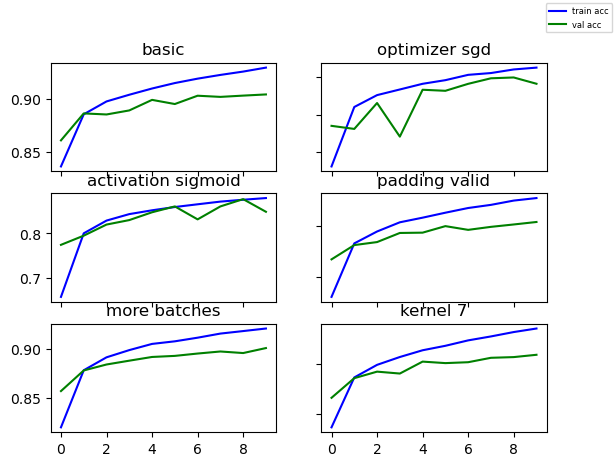

In [33]:
fig, ax = plt.subplots(3, 2)
#fig, ((ax1, ax2,ax3, ax4), ( ax5, ax6 )) = plt.subplots(3, 2)
fig.suptitle('')
ax[0,0].plot(history_1.history['accuracy'], 'blue')
ax[0,0].plot(history_1.history['val_accuracy'], 'green')
ax[0,0].set_title('basic')

ax[0,1].plot(history_1_1.history['accuracy'], 'blue')
ax[0,1].plot(history_1_1.history['val_accuracy'], 'green')
ax[0,1].set_title('optimizer sgd')
ax[1,0].plot(history_1_2.history['accuracy'], 'blue')
ax[1,0].plot(history_1_2.history['val_accuracy'], 'green')
ax[1,0].set_title('activation sigmoid')
ax[1,1].plot(history_1_3.history['accuracy'], 'blue')
ax[1,1].plot(history_1_3.history['val_accuracy'], 'green')
ax[1,1].set_title('padding valid')
ax[2,0].plot(history_1_4.history['accuracy'], 'blue')
ax[2,0].plot(history_1_4.history['val_accuracy'], 'green')
ax[2,0].set_title('more batches')
ax[2,1].plot(history_1_5.history['accuracy'], 'blue')
ax[2,1].plot(history_1_5.history['val_accuracy'], 'green')
ax[2,1].set_title('kernel 7')

fig.legend(['train acc', 'val acc'], fontsize=6)

for ax in fig.get_axes():
    ax.label_outer()

[Back to table of contents](#toc)

## Adding more layers, changing layer settings <a class="anchor" id="modele25"></a>

### Model 2 <a class="anchor" id="model2"></a>
#### 2 convolutions layer

In [34]:
#model_2.save_weights('model_1.h5')
#model_1 = load_model('model_1.h5')

In [35]:
model_2 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(num_classes, activation='softmax')
    ])

model_2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
x_train_2 = x_train[:]
x_test_2 = x_test[:]

y_train_2 = y_train[:] 
y_test_2 = y_test[:] 

In [37]:
history_2 = model_2.fit(x_train_2, y_train_2,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(x_test_2, y_test_2))

Epoch 1/10
938/938 [==============================] - 45s 48ms/step - loss: 0.4042 - accuracy: 0.8586 - val_loss: 0.3043 - val_accuracy: 0.8919
Epoch 2/10
938/938 [==============================] - 43s 46ms/step - loss: 0.2645 - accuracy: 0.9065 - val_loss: 0.2764 - val_accuracy: 0.8991
Epoch 3/10
938/938 [==============================] - 44s 47ms/step - loss: 0.2211 - accuracy: 0.9209 - val_loss: 0.2568 - val_accuracy: 0.9074
Epoch 4/10
938/938 [==============================] - 43s 46ms/step - loss: 0.1916 - accuracy: 0.9307 - val_loss: 0.2482 - val_accuracy: 0.9154
Epoch 5/10
938/938 [==============================] - 44s 47ms/step - loss: 0.1676 - accuracy: 0.9396 - val_loss: 0.2621 - val_accuracy: 0.9081
Epoch 6/10
938/938 [==============================] - 43s 46ms/step - loss: 0.1493 - accuracy: 0.9461 - val_loss: 0.2533 - val_accuracy: 0.9120
Epoch 7/10
938/938 [==============================] - 45s 48ms/step - loss: 0.1312 - accuracy: 0.9535 - val_loss: 0.2651 - val_accuracy:

In [38]:
loss_2, acc_2 = model_2.evaluate(x_test_2, y_test_2, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_2))

157/157 [==============================] - 1s 9ms/step - loss: 0.2792 - accuracy: 0.9189

Test accuracy: 91.9%


[Back to table of contents](#toc)

### Model 3 <a class="anchor" id="model3"></a>
#### 3  convolutions layer

In [39]:
model_3 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(num_classes, activation='softmax')
    ])

model_3.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
x_train_3 = x_train[:]
x_test_3 = x_test[:]

y_train_3 = y_train[:] 
y_test_3 = y_test[:] 

In [41]:
history_3 = model_3.fit(x_train_3, y_train_3,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(x_test_3, y_test_3))

Epoch 1/10
938/938 [==============================] - 65s 69ms/step - loss: 0.3937 - accuracy: 0.8600 - val_loss: 0.3118 - val_accuracy: 0.8889
Epoch 2/10
938/938 [==============================] - 62s 66ms/step - loss: 0.2450 - accuracy: 0.9135 - val_loss: 0.2515 - val_accuracy: 0.9102
Epoch 3/10
938/938 [==============================] - 67s 71ms/step - loss: 0.1994 - accuracy: 0.9281 - val_loss: 0.2372 - val_accuracy: 0.9173
Epoch 4/10
938/938 [==============================] - 66s 70ms/step - loss: 0.1688 - accuracy: 0.9395 - val_loss: 0.2316 - val_accuracy: 0.9191
Epoch 5/10
938/938 [==============================] - 62s 66ms/step - loss: 0.1419 - accuracy: 0.9488 - val_loss: 0.2330 - val_accuracy: 0.9187
Epoch 6/10
938/938 [==============================] - 60s 64ms/step - loss: 0.1177 - accuracy: 0.9576 - val_loss: 0.2380 - val_accuracy: 0.9212
Epoch 7/10
938/938 [==============================] - 61s 65ms/step - loss: 0.0959 - accuracy: 0.9660 - val_loss: 0.2713 - val_accuracy:

In [42]:
loss_3, acc_3 = model_3.evaluate(x_test_3, y_test_3, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_3))

157/157 [==============================] - 2s 13ms/step - loss: 0.3259 - accuracy: 0.9178

Test accuracy: 91.8%


[Back to table of contents](#toc)

### Model 4 <a class="anchor" id="model4"></a>
#### 2  convolutions layer, fully connected layer, dropout

In [46]:
model_4 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
    ])

model_4.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
x_train_4 = x_train[:]
x_test_4 = x_test[:]

y_train_4 = y_train[:] 
y_test_4 = y_test[:] 

In [48]:
history_4 = model_4.fit(x_train_4, y_train_4,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(x_test_4, y_test_4))

Epoch 1/10
938/938 [==============================] - 53s 56ms/step - loss: 0.3882 - accuracy: 0.8629 - val_loss: 0.3296 - val_accuracy: 0.8817
Epoch 2/10
938/938 [==============================] - 55s 58ms/step - loss: 0.2465 - accuracy: 0.9107 - val_loss: 0.2608 - val_accuracy: 0.9088
Epoch 3/10
938/938 [==============================] - 54s 58ms/step - loss: 0.2003 - accuracy: 0.9265 - val_loss: 0.2284 - val_accuracy: 0.9204
Epoch 4/10
938/938 [==============================] - 54s 58ms/step - loss: 0.1656 - accuracy: 0.9387 - val_loss: 0.2316 - val_accuracy: 0.9168
Epoch 5/10
938/938 [==============================] - 52s 56ms/step - loss: 0.1427 - accuracy: 0.9467 - val_loss: 0.2309 - val_accuracy: 0.9228
Epoch 6/10
938/938 [==============================] - 53s 57ms/step - loss: 0.1182 - accuracy: 0.9556 - val_loss: 0.2424 - val_accuracy: 0.9208
Epoch 7/10
938/938 [==============================] - 52s 56ms/step - loss: 0.0986 - accuracy: 0.9633 - val_loss: 0.2266 - val_accuracy:

In [49]:
loss_4, acc_4 = model_4.evaluate(x_test_4, y_test_4, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_4))

157/157 [==============================] - 2s 10ms/step - loss: 0.2901 - accuracy: 0.9208

Test accuracy: 92.1%


[Back to table of contents](#toc)

### Model 5 <a class="anchor" id="model5"></a>
#### fully connected layer, dropout

In [50]:
model_5 = Sequential([
    Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
    ])

model_5.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
x_train_5 = x_train[:]
x_test_5 = x_test[:]

y_train_5 = y_train[:]
y_test_5 = y_test[:] 

In [52]:
history_5 = model_5.fit(x_train_5, y_train_5,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_data=(x_test_5, y_test_5))

Epoch 1/10
938/938 [==============================] - 67s 70ms/step - loss: 0.4565 - accuracy: 0.8367 - val_loss: 0.3239 - val_accuracy: 0.8763
Epoch 2/10
938/938 [==============================] - 64s 68ms/step - loss: 0.2791 - accuracy: 0.8986 - val_loss: 0.2753 - val_accuracy: 0.8977
Epoch 3/10
938/938 [==============================] - 63s 68ms/step - loss: 0.2352 - accuracy: 0.9143 - val_loss: 0.2324 - val_accuracy: 0.9146
Epoch 4/10
938/938 [==============================] - 65s 69ms/step - loss: 0.2029 - accuracy: 0.9262 - val_loss: 0.2338 - val_accuracy: 0.9171
Epoch 5/10
938/938 [==============================] - 65s 69ms/step - loss: 0.1781 - accuracy: 0.9337 - val_loss: 0.2227 - val_accuracy: 0.9217
Epoch 6/10
938/938 [==============================] - 67s 71ms/step - loss: 0.1586 - accuracy: 0.9418 - val_loss: 0.2203 - val_accuracy: 0.9210
Epoch 7/10
938/938 [==============================] - 66s 70ms/step - loss: 0.1382 - accuracy: 0.9485 - val_loss: 0.2212 - val_accuracy:

In [53]:
loss_5, acc_5 = model_5.evaluate(x_test_5, y_test_5, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc_5))

157/157 [==============================] - 2s 10ms/step - loss: 0.2586 - accuracy: 0.9252

Test accuracy: 92.5%


[Back to table of contents](#toc)

### Comparison models 2-5 <a class="anchor" id="compare25"></a>


In [54]:
print('2. Two convolutional layer')
print("Train accuracy: %.1f%%" % (100.0 * history_2.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_2))
print('3. Three convolutional layer')
print("Train accuracy: %.1f%%" % (100.0 * history_3.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_3))
print('4. Two convolutional layer, dropout and additional dense layer')
print("Train accuracy: %.1f%%" % (100.0 * history_4.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_4))
print('5. Three convolutional layer, change kernel, dropout and two additional dense layer')
print("Train accuracy: %.1f%%" % (100.0 * history_5.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_5))


2. Two convolutional layer
Train accuracy: 96.8%
Test accuracy: 91.9%

3. Three convolutional layer
Train accuracy: 97.8%
Test accuracy: 91.8%

4. Two convolutional layer, dropout and additional dense layer
Train accuracy: 97.8%
Test accuracy: 92.1%

5. Three convolutional layer, change kernel, dropout and two additional dense layer
Train accuracy: 96.4%
Test accuracy: 92.5%



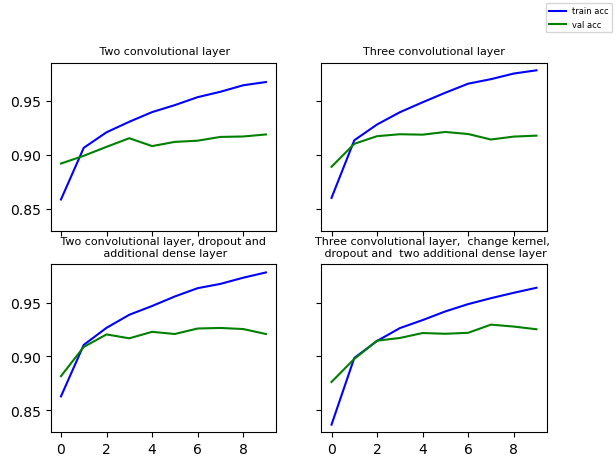

In [65]:
fig, ax = plt.subplots(2, 2,sharey='all')

fig.suptitle('')
ax[0,0].plot(history_2.history['accuracy'], 'blue')
ax[0,0].plot(history_2.history['val_accuracy'], 'green')
ax[0,0].set_title(' Two convolutional layer',fontsize=8)
ax[0,1].plot(history_3.history['accuracy'], 'blue')
ax[0,1].plot(history_3.history['val_accuracy'], 'green')
ax[0,1].set_title('Three convolutional layer',fontsize=8)
ax[1,0].plot(history_4.history['accuracy'], 'blue')
ax[1,0].plot(history_4.history['val_accuracy'], 'green')
ax[1,0].set_title(' Two convolutional layer, dropout and \n additional dense layer',fontsize=8)
ax[1,1].plot(history_5.history['accuracy'], 'blue')
ax[1,1].plot(history_5.history['val_accuracy'], 'green')
ax[1,1].set_title('Three convolutional layer,  change kernel, \n dropout and  two additional dense layer',fontsize=8)


fig.legend(['train acc', 'val acc'], fontsize=6)

for ax in fig.get_axes():
    ax.label_outer()
    

[Back to table of contents](#toc)